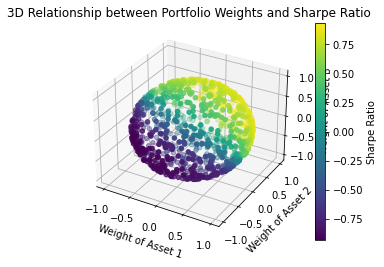

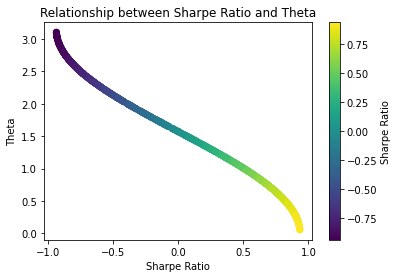

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import cholesky, norm

def random_points_on_unit_sphere(num_points):
    """Generates num_points uniformly distributed on the surface.
    If we make the K simplex an np.random.dirichlet, the sum of weight will be 1.
    I think we can take advantage of this in the no-shot constraint.
    """
    points = np.random.normal(size=(num_points, 3))
    points /= np.linalg.norm(points, axis=1)[:, np.newaxis]  # normalize to unit length
    return points.T

np.random.seed(42)

num_assets = 3
num_portfolios = 1000

mu = np.random.rand(num_assets)
A  = np.random.rand(num_assets, num_assets) # Sigma
Sigma = np.dot(A, A.transpose())
L_Sigma = cholesky(Sigma) # Proposition 2
w_star = np.linalg.inv(Sigma) @ mu # Proposition 2 (Appendix A.1)
portfolios = random_points_on_unit_sphere(num_portfolios) # Check this method

SRs = np.empty(num_portfolios)
thetas = np.empty(num_portfolios)
L_Sigma_w_star = L_Sigma.T @ w_star

for i in range(num_portfolios):
    # Notice that we suppose risk-free rate is zero.
    w_i = portfolios[:, i]
    SRs[i] = mu @ w_i / np.sqrt(w_i @ Sigma @ w_i)
    L_Sigma_w_i = L_Sigma.T @ w_i
    thetas[i] = np.arccos(L_Sigma_w_i.T @ L_Sigma_w_star /  (norm(L_Sigma_w_i) * norm(L_Sigma_w_star)))

############## todo list ##############
############ Proposition 3 ############
#######################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(portfolios[0, :], portfolios[1, :], portfolios[2, :], c=SRs, cmap='viridis')
fig.colorbar(p, label='Sharpe Ratio')
ax.set_xlabel('Weight of Asset 1')
ax.set_ylabel('Weight of Asset 2')
ax.set_zlabel('Weight of Asset 3')
ax.set_title('3D Relationship between Portfolio Weights and Sharpe Ratio')
plt.show()

# Plot relationship between theta_i and SR(w_i | mu, Sigma)
plt.scatter(SRs, thetas, c=SRs, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Theta')
plt.title('Relationship between Sharpe Ratio and Theta')
plt.show()

### Paper result Chapter 2.1.

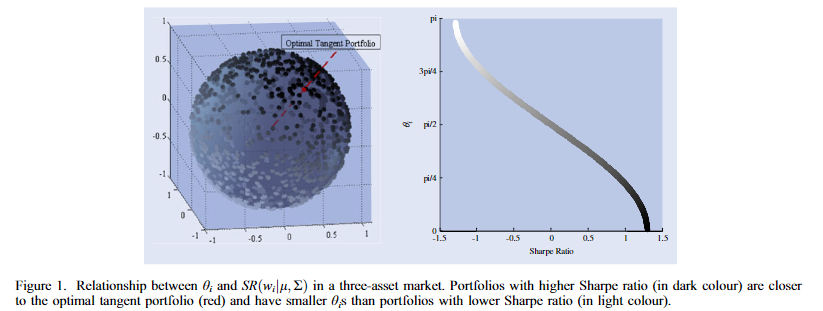